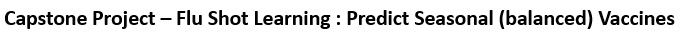

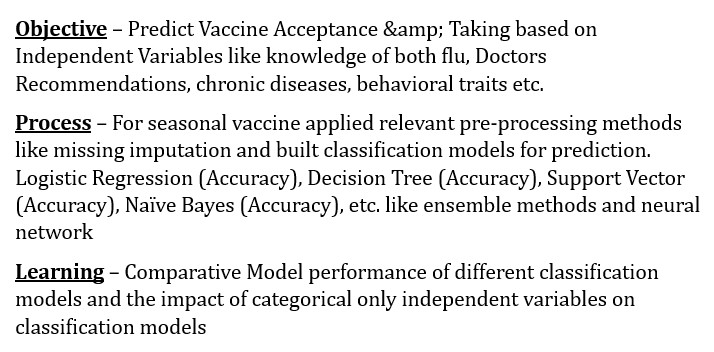

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "E:\Chicago"

E:\Chicago


In [3]:
vactrainlabels=pd.read_csv("vactrainlabels.csv")

In [4]:
vactrain=pd.read_csv('vactrain.csv')

In [5]:
vactest=pd.read_csv("vactest.csv")

In [6]:
vactrainlabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
vactrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
vactest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [9]:
vactest.isnull().sum().sort_values(ascending=False)/vactest.shape[0]

employment_occupation          0.502696
employment_industry            0.497042
health_insurance               0.457840
income_poverty                 0.168377
doctor_recc_h1n1               0.080875
doctor_recc_seasonal           0.080875
rent_or_own                    0.076232
employment_status              0.055077
marital_status                 0.053991
education                      0.052681
chronic_med_condition          0.034896
child_under_6_months           0.030440
health_worker                  0.029542
opinion_seas_sick_from_vacc    0.019507
opinion_seas_risk              0.018684
opinion_seas_vacc_effective    0.016924
opinion_h1n1_vacc_effective    0.014902
opinion_h1n1_risk              0.014228
opinion_h1n1_sick_from_vacc    0.014041
household_children             0.008424
household_adults               0.008424
behavioral_avoidance           0.007975
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004568
h1n1_concern                   0.003183


In [10]:
print(vactrain.shape)
print(vactest.shape)
print(vactrainlabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [11]:
# Algorithm based missing values imputation - considers the impact of other variables on the 
# missing value and impute accordingly

# MICE - Multivariate imputation using chained equations simultaneously impute both numeric & non numeric missing values

# Initially imputed with mean, Median or mode and chained equation are built

# Chained equations where in the missing value column/variable is treated as dependent variable and relevant classification

# or regression model build and prediction done.

# Missing value will be replaced with predicted value.

In [12]:
combinedf=pd.concat([vactrain,vactest],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

# Exploratory Data Analysis using vaccinetrain_df

<Axes: ylabel='sex'>

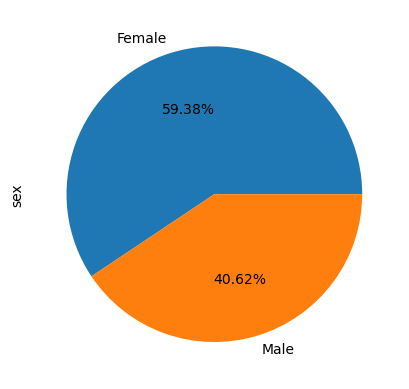

In [14]:
vactrain.sex.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='education'>

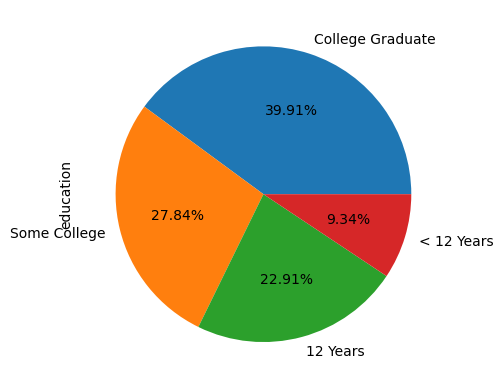

In [15]:
vactrain.education.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='marital_status'>

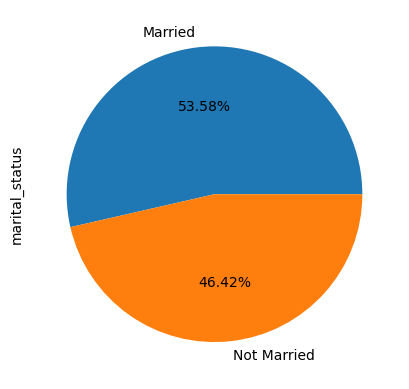

In [16]:
vactrain.marital_status.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='health_insurance'>

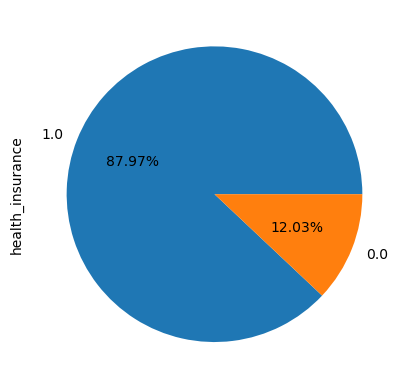

In [17]:
vactrain.health_insurance.value_counts().plot(kind='pie',autopct='%.2f%%')

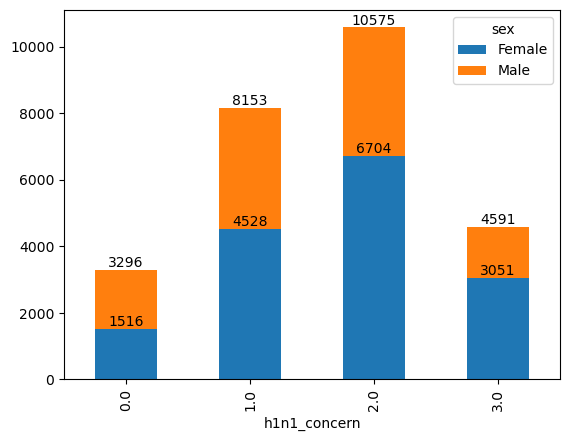

In [18]:
ax=pd.crosstab(vactrain.h1n1_concern,vactrain.sex).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

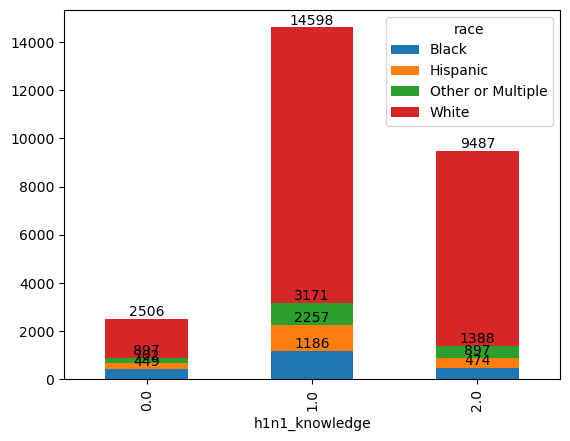

In [19]:
ax=pd.crosstab(vactrain.h1n1_knowledge,vactrain.race).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

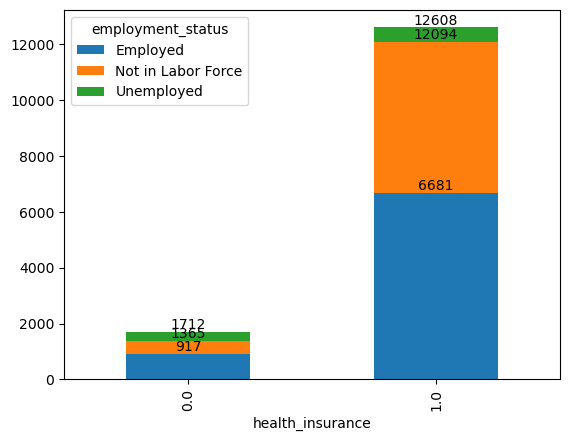

In [20]:
ax=pd.crosstab(vactrain.health_insurance,vactrain.employment_status).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

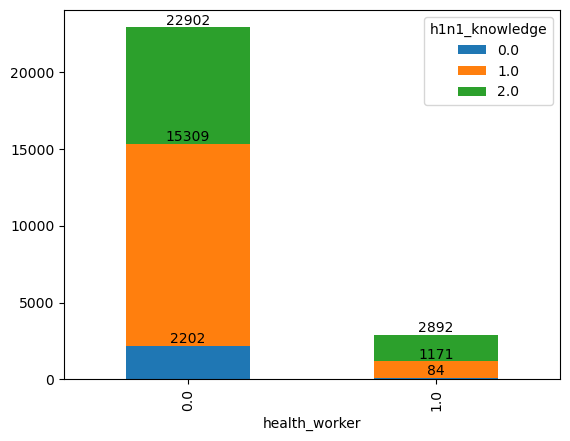

In [21]:
ax=pd.crosstab(vactrain.health_worker,vactrain.h1n1_knowledge).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing

In [22]:
# Test Null No Association between seasonal_vaccine & h1n1concern
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_concern)

h1n1_concern,0.0,1.0,2.0,3.0
seasonal_vaccine,,,,
0,2254,4811,5135,2022
1,1042,3342,5440,2569


In [23]:
from scipy.stats import chi2_contingency

In [24]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_concern))
# since pvalue is 4.102289002153701e-143 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=661.7625859400396, pvalue=4.102289002153701e-143, dof=3, expected_freq=array([[1761.25162502, 4356.63971445, 5650.86041706, 2453.24824347],
       [1534.74837498, 3796.36028555, 4924.13958294, 2137.75175653]]))

In [25]:
# Test Null No Association between seasonal_vaccine & h1n1knowledge

In [26]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_knowledge)

h1n1_knowledge,0.0,1.0,2.0
seasonal_vaccine,,,
0,1588,8290,4334
1,918,6308,5153


In [27]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_knowledge))
# since pvalue is 2.2158145679676294e-86 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=394.45339582163825, pvalue=2.2158145679676294e-86, dof=2, expected_freq=array([[1339.37317137, 7802.14267985, 5070.48414877],
       [1166.62682863, 6795.85732015, 4416.51585123]]))

In [28]:
# Test Null No Association between seasonal_vaccine & health_worker

In [29]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.health_worker)

health_worker,0.0,1.0
seasonal_vaccine,,
0,12753,1023
1,10251,1876


In [30]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.health_worker))
# since pvalue is 3.969585517032047e-93 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=419.02923573796994, pvalue=3.969585517032047e-93, dof=1, expected_freq=array([[12234.2239895,  1541.7760105],
       [10769.7760105,  1357.2239895]]))

In [31]:
# Test Null No Association between seasonal_vaccine & sex

In [32]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.sex)

sex,Female,Male
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [33]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.sex))
# since pvalue is 2.5248076319253385e-36 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=158.40462897107128, pvalue=2.5248076319253385e-36, dof=1, expected_freq=array([[8474.38409406, 5797.61590594],
       [7383.61590594, 5051.38409406]]))

In [34]:
# Test Null No Association between seasonal_vaccine & employment_status

In [35]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.employment_status)

employment_status,Employed,Not in Labor Force,Unemployed
seasonal_vaccine,,,
0,7839,4523,1014
1,5721,5708,439


In [36]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.employment_status))
# since pvalue is 1.0933141469852619e-132 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=607.7040373802583, pvalue=1.0933141469852619e-132, dof=2, expected_freq=array([[7185.01663762, 5421.08445571,  769.89890667],
       [6374.98336238, 4809.91554429,  683.10109333]]))

In [37]:
# Test Null No Association between seasonal_vaccine & education

In [38]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.education)

education,12 Years,< 12 Years,College Graduate,Some College
seasonal_vaccine,,,,
0,3199,1415,4933,3860
1,2598,948,5164,3183


In [39]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.education))
# since pvalue is 1.0933141469852619e-132 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=134.84444384720678, pvalue=4.885885372081626e-29, dof=3, expected_freq=array([[3071.95173913, 1252.20320158, 5350.61181818, 3732.23324111],
       [2725.04826087, 1110.79679842, 4746.38818182, 3310.76675889]]))

In [40]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [41]:
# For using iterative Imputer in sklearn which is experimental as of now 
# 1) Remove variables or columns not needed
# 2) Labelencode all object and categorical data but retain the missing value as it is.

In [42]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
original=combinedf

In [45]:
mask=combinedf.isnull()

In [46]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [47]:
combinedf=combinedf.where(~mask,original)

In [48]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [49]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.tree import DecisionTreeClassifier

In [50]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",max_iter=20)

In [51]:
combinedf_impute=imputer.fit_transform(combinedf)

C:\Users\Maheshamb\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [52]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

In [53]:
combinedf_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<Axes: >

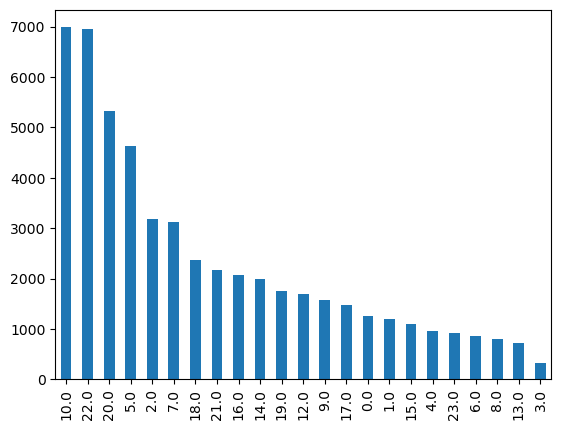

In [54]:
combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')

<Axes: >

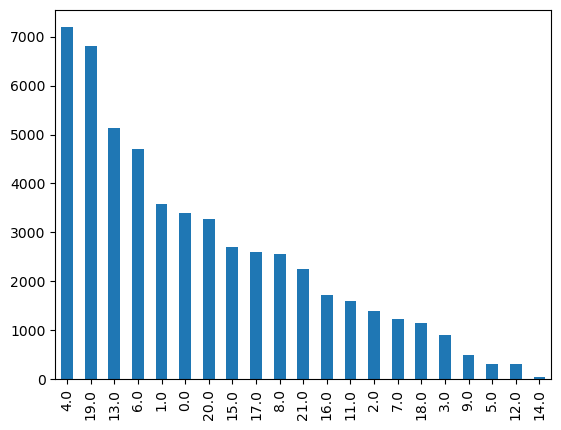

In [55]:
combinedf_impute.employment_industry.value_counts(dropna=False).plot(kind='bar')

# Splitting back the data to Train data and Test data

In [56]:
vac_train=combinedf_impute.loc[0:26706]

In [57]:
vac_test=combinedf_impute.loc[26707:53414]

In [58]:
print(vac_train.shape)
print(vactrain.shape)
print(vac_test.shape)
print(vactest.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


In [59]:
y=vactrainlabels.seasonal_vaccine
x=vac_train

<Axes: >

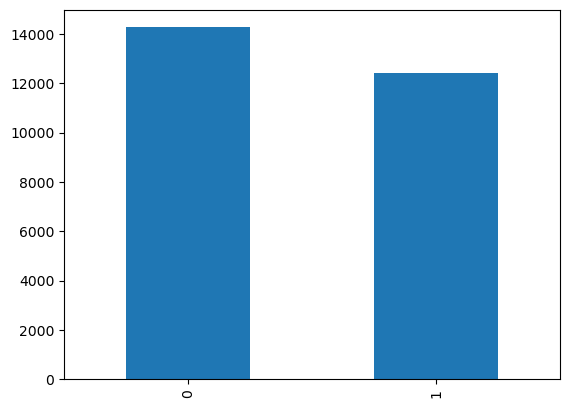

In [60]:
y.value_counts().plot(kind='bar')

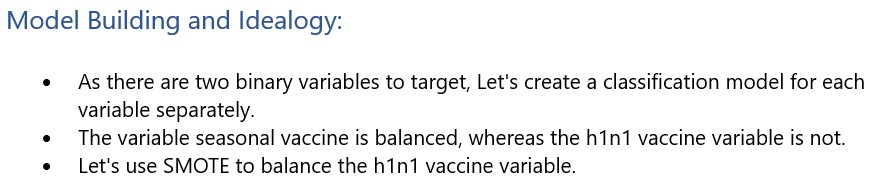

# Logistic Regression for Seasonal Vaccine

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [62]:
logit=LogisticRegression(max_iter=2000)

In [63]:
logitmodel=logit.fit(x,y)

In [64]:
logitmodel.score(x,y)

0.7724192159358969

In [65]:
cross_val_score(logit,x,y)

array([0.76226133, 0.77442905, 0.77513574, 0.77663359, 0.76727205])

In [117]:
np.mean([0.76226133, 0.77442905, 0.77513574, 0.77663359, 0.76727205])

0.7711463519999999

In [66]:
logitpredict=logitmodel.predict(x)

In [67]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



In [68]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11494,2778
1,3300,9135


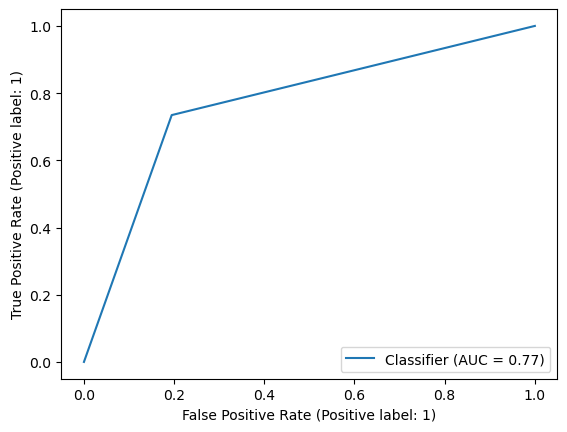

In [69]:
RocCurveDisplay.from_predictions(y,logitpredict)

# Decision Tree Classification for Seasonal Vaccine

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
tree=DecisionTreeClassifier(max_depth=10)

In [72]:
treemodel=tree.fit(x,y)

In [73]:
treemodel.score(x,y)

0.8142060134047253

In [74]:
cross_val_score(tree,x,y)

array([0.74391614, 0.74335455, 0.74798727, 0.74761281, 0.74686388])

In [116]:
np.mean([0.74391614, 0.74335455, 0.74798727, 0.74761281, 0.74686388])

0.74594693

In [76]:
treepredict=treemodel.predict(x)

In [77]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     14272
           1       0.80      0.80      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



In [78]:
pd.crosstab(y,treepredict)

col_0,0,1
seasonal_vaccine,,
0,11746,2526
1,2436,9999


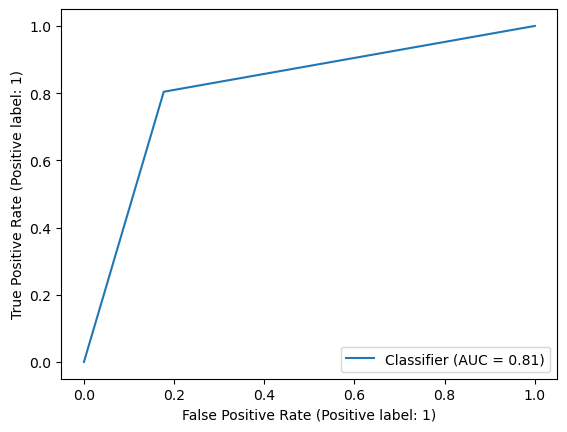

In [79]:
RocCurveDisplay.from_predictions(y,treepredict)

# Random Forest Classification for Seasonal Vaccine

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
RF=RandomForestClassifier(n_estimators=3000,max_depth=12)

In [82]:
RFmodel=RF.fit(x,y)

In [83]:
RFmodel.score(x,y)

0.8670760474781892

In [84]:
cross_val_score(RF,x,y)

array([0.77293149, 0.77779858, 0.77944205, 0.78056544, 0.77569743])

In [115]:
np.mean([0.77293149, 0.77779858, 0.77944205, 0.78056544, 0.77569743])

0.7772869980000001

In [86]:
RFpredict=RFmodel.predict(x)

In [87]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,12708,1564
1,1986,10449


In [88]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14272
           1       0.87      0.84      0.85     12435

    accuracy                           0.87     26707
   macro avg       0.87      0.87      0.87     26707
weighted avg       0.87      0.87      0.87     26707



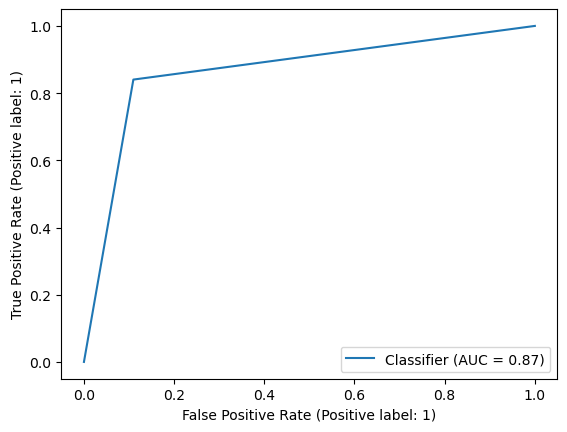

In [89]:
RocCurveDisplay.from_predictions(y,RFpredict)

# Gradient Boosting Classification for Seasonal Vaccine

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gb=GradientBoostingClassifier(n_estimators=3000)

In [92]:
gbmodel=gb.fit(x,y)

In [93]:
gbmodel.score(x,y)

0.841914104916314

In [94]:
gbpredict=gbmodel.predict(x)

In [96]:
cross_val_score(gb,x,y)

array([0.76394609, 0.77012355, 0.7760719 , 0.77625913, 0.77251451])

In [113]:
np.mean([0.76394609, 0.77012355, 0.7760719 , 0.77625913, 0.77251451])

0.7717830360000001

In [114]:
print(classification_report(y,gbpredict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     14272
           1       0.83      0.83      0.83     12435

    accuracy                           0.84     26707
   macro avg       0.84      0.84      0.84     26707
weighted avg       0.84      0.84      0.84     26707



In [ ]:
pd.crosstab(y,gbpredict)

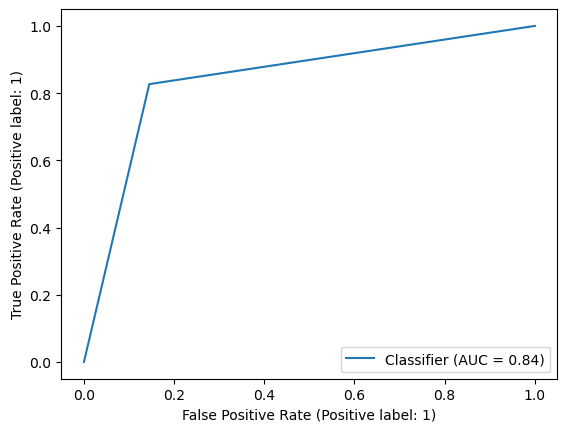

In [99]:
RocCurveDisplay.from_predictions(y,gbpredict)

# Support Vector Classification for Seasonal Vaccine

In [100]:
from sklearn.svm import SVC

In [101]:
clf=SVC()

In [102]:
clfmodel=clf.fit(x,y)

In [103]:
clfmodel.score(x,y)

0.7784101546411053

In [106]:
clfpredict=clfmodel.predict(x)

In [107]:
cross_val_score(clf,x,y)

array([0.76956196, 0.77648821, 0.77682082, 0.77981651, 0.77251451])

In [109]:
np.mean([0.76956196, 0.77648821, 0.77682082, 0.77981651, 0.77251451])

0.775040402

In [110]:
print(classification_report(y,clfpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.78      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



In [111]:
pd.crosstab(y,clfpredict)

col_0,0,1
seasonal_vaccine,,
0,11613,2659
1,3259,9176


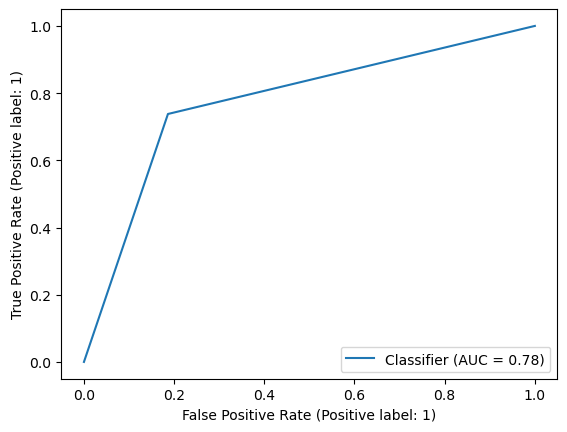

In [112]:
RocCurveDisplay.from_predictions(y,clfpredict)

# Naive Bayes Classification for Seasonal Vaccine

In [118]:
from sklearn.naive_bayes import BernoulliNB

In [119]:
nb=BernoulliNB()

In [120]:
nbmodel=nb.fit(x,y)

In [121]:
nbmodel.score(x,y)

0.7070805406822182

In [122]:
nbpredict=nbmodel.predict(x)

In [123]:
pd.crosstab(y,nbpredict)

col_0,0,1
seasonal_vaccine,,
0,10205,4067
1,3756,8679


In [124]:
cross_val_score(nb,x,y)

array([0.69767877, 0.71490079, 0.70604756, 0.71166448, 0.70192848])

In [125]:
np.mean([0.69767877, 0.71490079, 0.70604756, 0.71166448, 0.70192848])

0.7064440160000001

In [126]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     14272
           1       0.68      0.70      0.69     12435

    accuracy                           0.71     26707
   macro avg       0.71      0.71      0.71     26707
weighted avg       0.71      0.71      0.71     26707



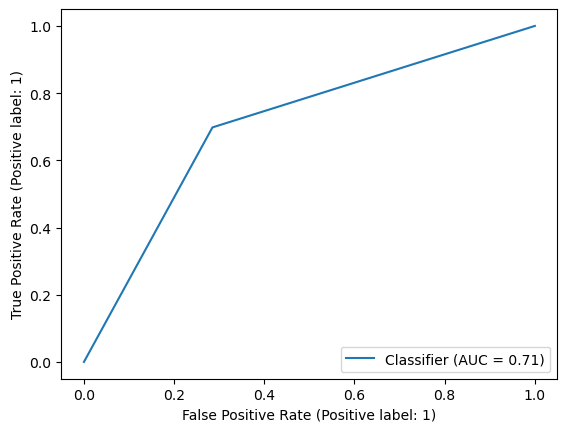

In [127]:
RocCurveDisplay.from_predictions(y,nbpredict)

# KNN Classification for Seasonal Vaccine

In [128]:
# Grid Search is method for performing hyper - parameter optimisation,that is with a given model.

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [130]:
knn=KNeighborsClassifier()

In [131]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [132]:
grid_search=grid.fit(x,y)

In [133]:
grid_search.score(x,y)

0.7635451379788071

In [134]:
grid_search.best_params_

{'n_neighbors': 23}

In [135]:
grid_search.best_score_

0.7331787208834957

In [136]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [137]:
knn_predict=grid_search.predict(x)

In [141]:
cross_val_score(knn,x,y)

array([0.69936353, 0.70760015, 0.7129751 , 0.70454971, 0.70717094])

In [142]:
np.mean([0.69936353, 0.70760015, 0.7129751 , 0.70454971, 0.70717094])

0.7063318860000001

In [138]:
pd.crosstab(y,knn_predict)

col_0,0,1
seasonal_vaccine,,
0,11214,3058
1,3257,9178


In [139]:
print(classification_report(y,knn_predict))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     14272
           1       0.75      0.74      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



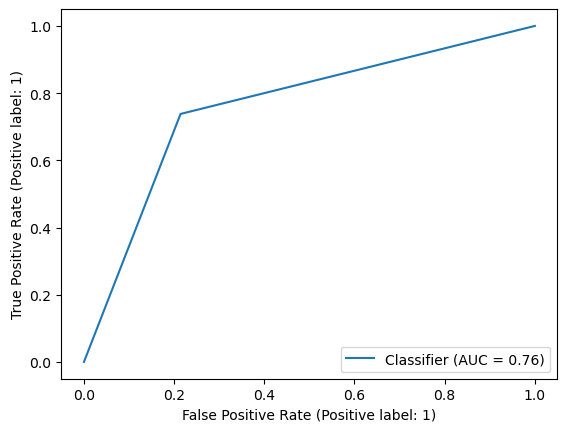

In [140]:
RocCurveDisplay.from_predictions(y,knn_predict)

# Performance Metric Report:

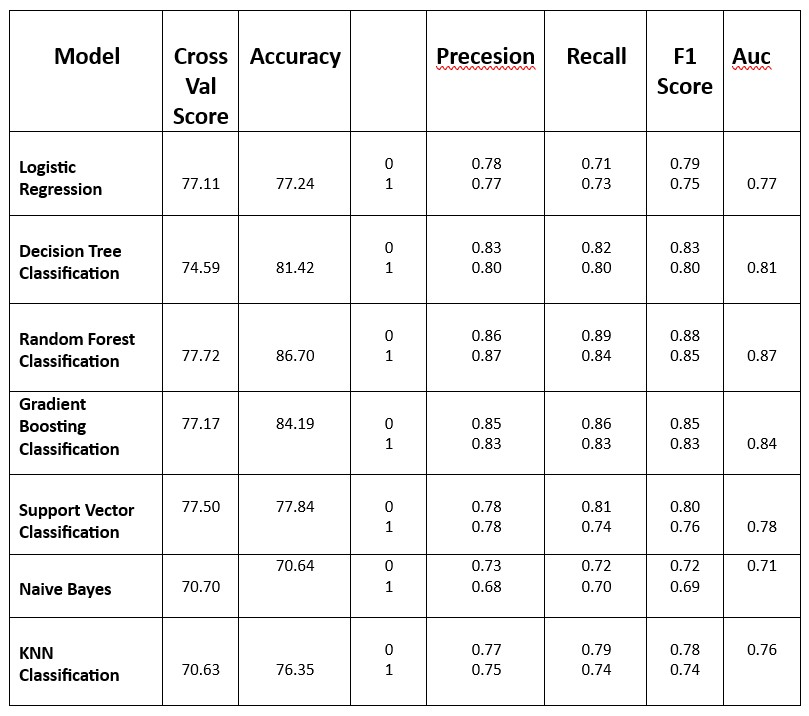

# Conclusion :

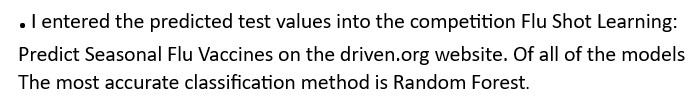